# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

C:\Users\gupta\AppData\Local\Continuum\miniconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\gupta\AppData\Local\Continuum\miniconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [4]:
data = pd.read_csv('files/original.csv')
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


## Map the data

Use the <i>'continent'</i> category for this analysis.

In [5]:
data_mapped = data.copy()
data_mapped['continent'] = data_mapped['continent'].map({'North America': 0, 'South America': 1, 'Africa': 2, 'Asia': 3, 'Europe': 4, 'Oceania': 5, 
                                                         'Seven seas (open ocean)': 6, 'Antarctica': 7})
data_mapped

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,3
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,4
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,3
238,South Africa,25.083901,-29.000341,2
239,Zambia,27.774759,-13.458242,2


## Select the features

In [6]:
x = data_mapped.iloc[:, 3:4]

## Clustering

Use 4 clusters initially.

In [7]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [8]:
identify_clusters = kmeans.fit_predict(x)
identify_clusters

array([0, 1, 3, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 2, 1, 1, 3, 1, 3, 3,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 3, 3, 1, 0, 1, 3, 3,
       3, 3, 2, 0, 3, 3, 0, 0, 0, 0, 1, 1, 1, 1, 3, 0, 1, 0, 3, 0, 3, 3,
       1, 1, 3, 1, 2, 0, 1, 1, 2, 3, 1, 1, 1, 3, 3, 3, 3, 3, 1, 0, 0, 0,
       2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 3, 1, 1, 2, 0, 1, 1, 1, 1, 1, 3, 3, 0, 1, 1, 3, 1, 1, 1,
       1, 0, 3, 1, 1, 3, 2, 0, 2, 1, 3, 1, 1, 1, 1, 2, 3, 3, 0, 2, 3, 1,
       3, 2, 3, 2, 3, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 1, 2, 2, 1, 0,
       1, 1, 0, 1, 2, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 2, 2, 2, 3, 0, 1, 3,
       3, 0, 1, 3, 0, 1, 1, 1, 3, 0, 2, 1, 0, 3, 3, 1, 1, 1, 1, 2, 0, 3,
       1, 1, 3, 3, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 2, 2, 1, 3, 3, 3])

In [10]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identify_clusters
data_with_clusters

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,0,0
1,Afghanistan,66.004734,33.835231,3,1
2,Angola,17.537368,-12.293361,2,3
3,Anguilla,-63.064989,18.223959,0,0
4,Albania,20.049834,41.142450,4,1
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,2
237,Yemen,47.586762,15.909280,3,1
238,South Africa,25.083901,-29.000341,2,3
239,Zambia,27.774759,-13.458242,2,3


## Plot the data

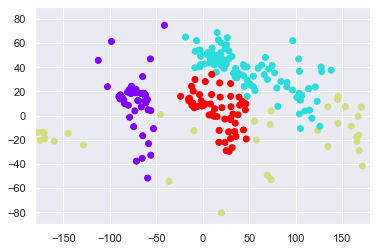

In [11]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()